<a href="https://colab.research.google.com/github/lorenzopaolucci/studenti/blob/master/DBSCAN_Lab_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generazione griglia controllo con spot di 1000, 3000, 10000, 30000 fotoni**

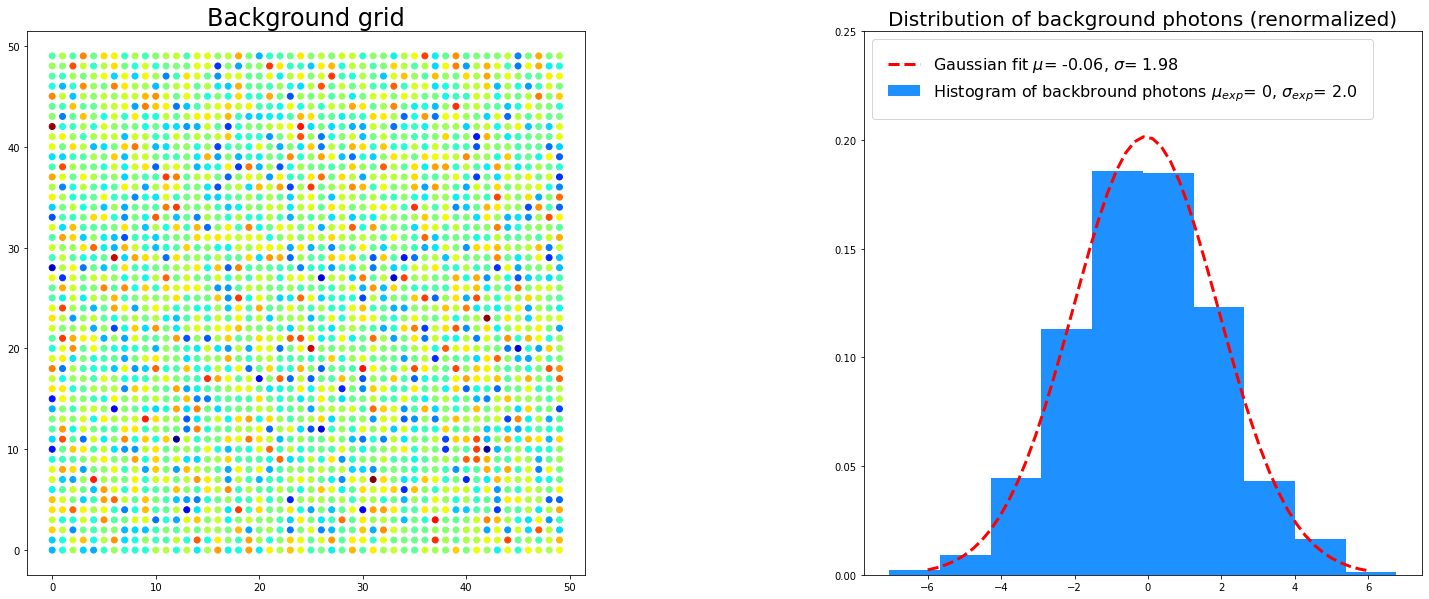

Signal grid with 1000 photons:
Marginalization values on y axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.41	σ= 3.92

Marginalization values on x axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.46	σ= 3.93



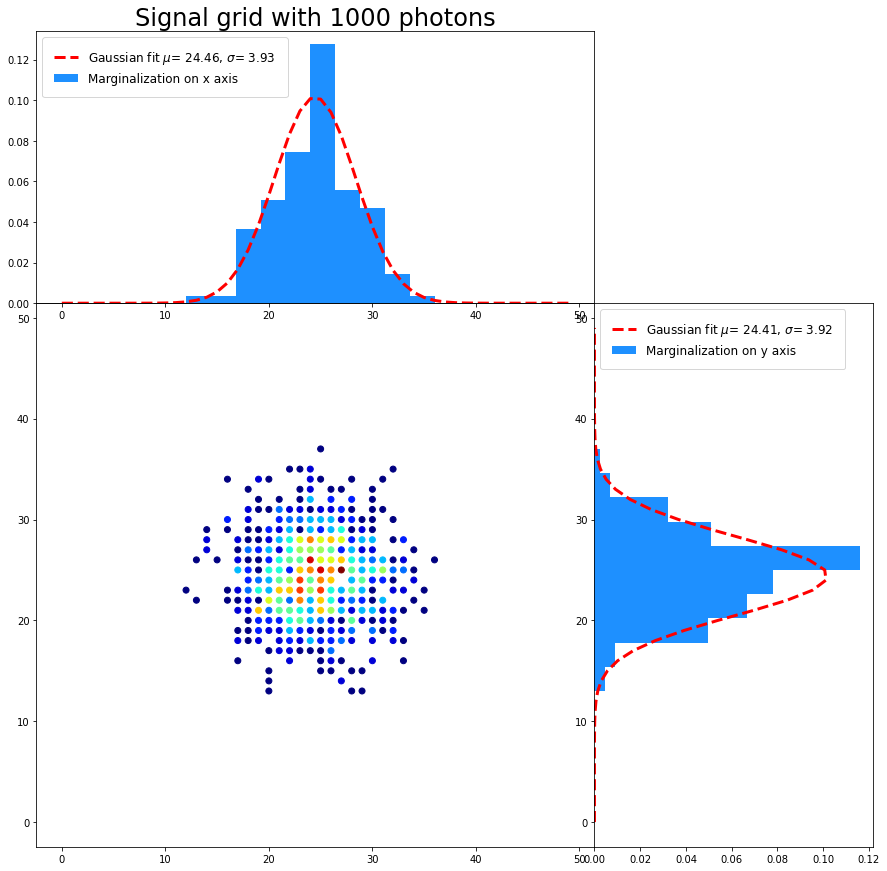






Signal grid with 3000 photons:
Marginalization values on y axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.37	σ= 3.94

Marginalization values on x axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.50	σ= 3.97



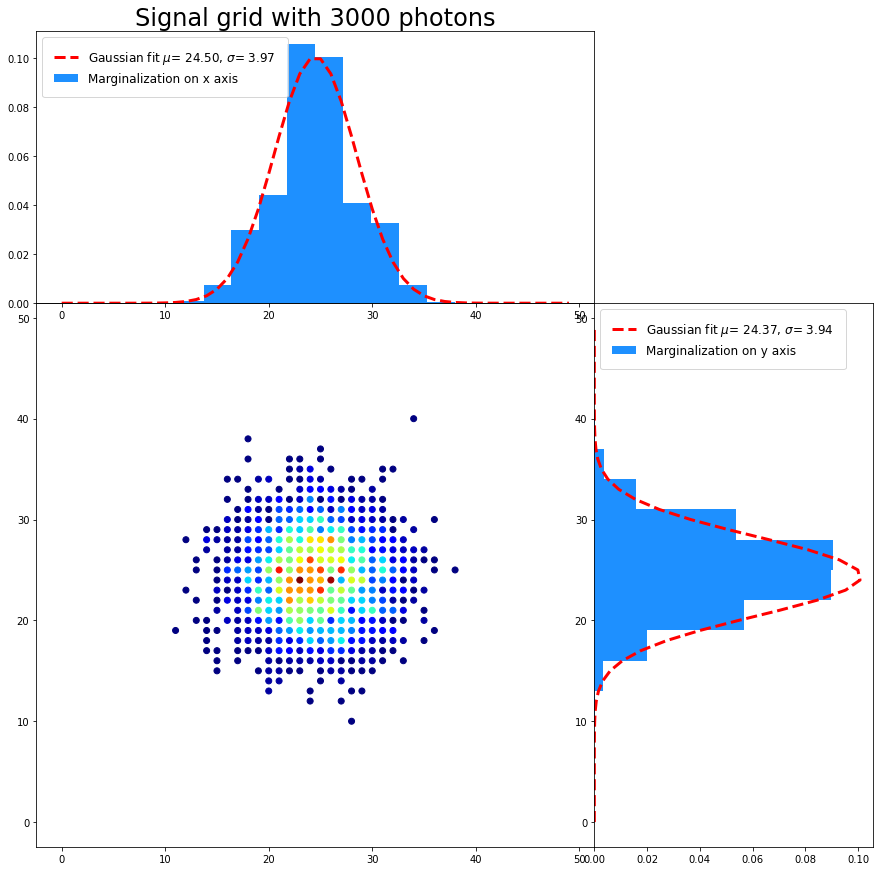






Signal grid with 10000 photons:
Marginalization values on y axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.45	σ= 4.00

Marginalization values on x axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.52	σ= 3.96



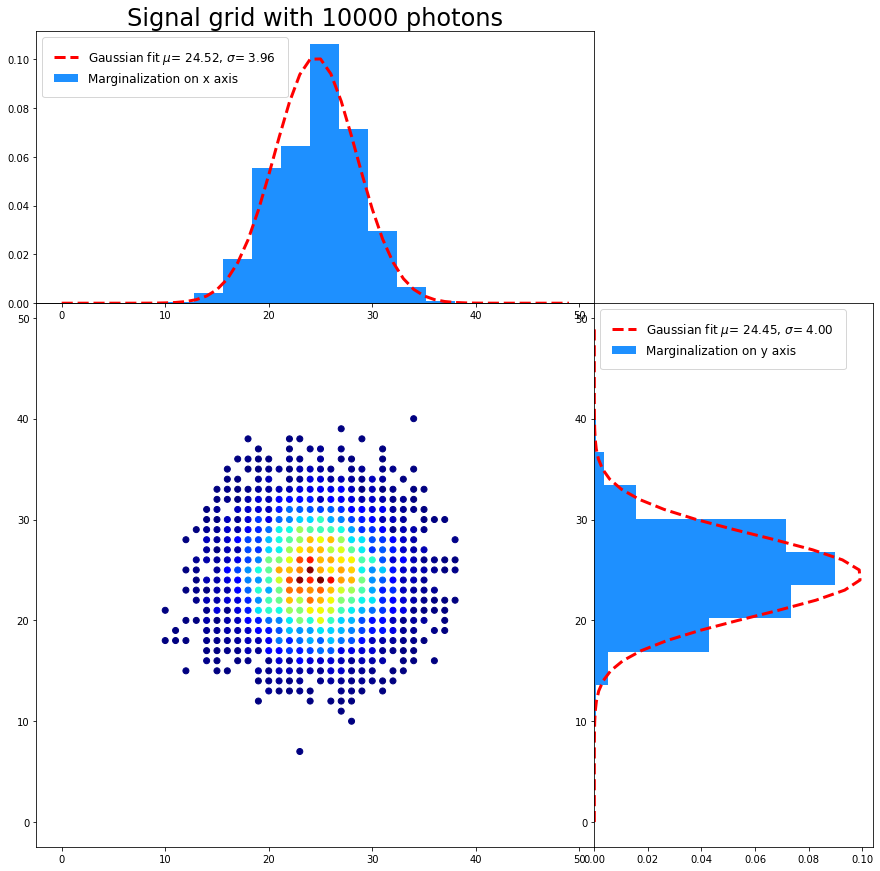






Signal grid with 30000 photons:
Marginalization values on y axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.47	σ= 4.02

Marginalization values on x axis
expected:	μ= 24.50	σ= 4.00
measured:	μ= 24.51	σ= 3.99



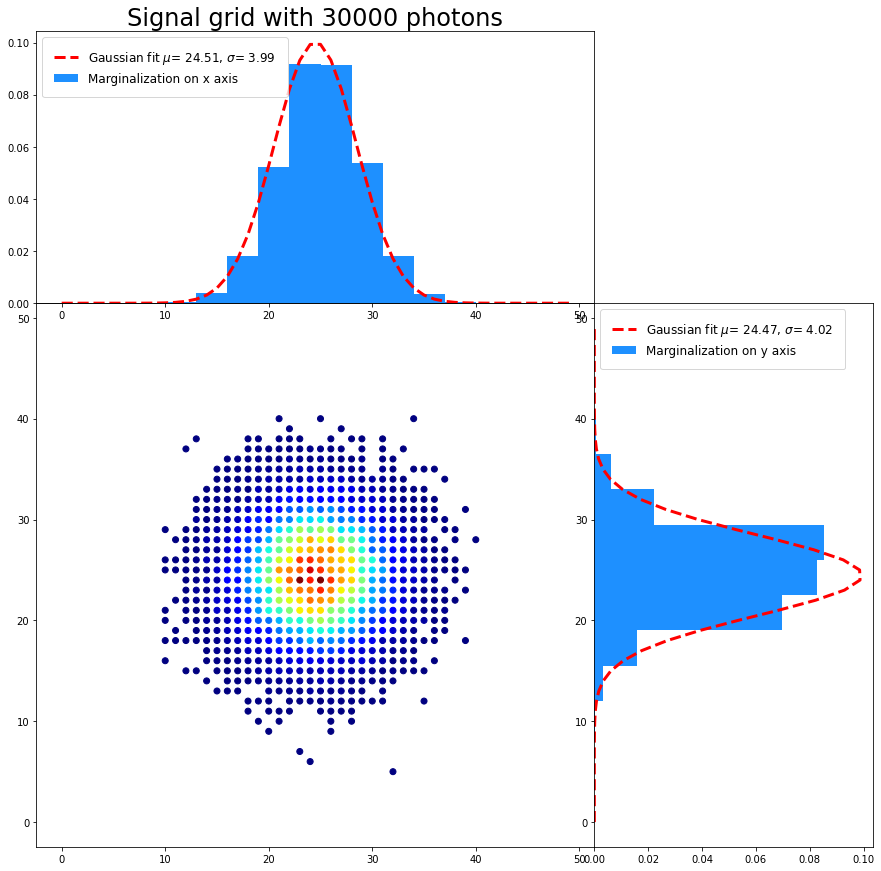

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

L = 50                            # Dimensione griglia
centers = [[(L-1)*0.5,(L-1)*0.5]] # Centro del blob
sigma_noise = 2                   # Sigma del rumore
sigma_spatial = 4                 # Sigma della distribuzione spaziale del blob (in pixel)

th = 1.5*sigma_noise
range_grid = [1000, 3000, 10000, 30000]

def array_for_fit(array):     # Trasforma il vettore contenente le frequenze in un vettore per l'istogramma
  result = []
  value = 0
  for i in array:
    for j in range(0, int(i), 1):
      result.append(value)
    value += 1
  return result
  

# Genero le griglie

grid = np.zeros((L,L))        # Contiene le "coordinate" di ogni pixel, e il valore del segnale
background = np.zeros((L,L))  # Griglia background

# Genero il fondo

background_list = []
noise_list = []

for i in np.arange(0,L,1):    

  for j in np.arange(0,L,1):

    r = np.random.normal(0,2)
    background[i][j] = r
    noise_list.append(r)

    if background[i][j] != 0:
      background_list.append([j,i,background[i][j]])


background_plot = np.array(background_list)   # Lista delle coordinate contenenti il rumore

# Istogramma rumore 

fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

hist_x = np.apply_along_axis(sum,0,background)
hist_y = np.apply_along_axis(sum,1,background)
x = np.linspace(0,L-1,L)
x_gaus = np.linspace(-6, 6, L)
hist_x_fit = array_for_fit(hist_x)
hist_y_fit = array_for_fit(hist_y)

ax1 = plt.subplot2grid((2,5),(1,0),rowspan=2,colspan=2)
ax1.scatter(background_plot[:,0],background_plot[:,1],c=background_plot[:,2],cmap='jet')
plt.title('Background grid', fontsize = 24)

mu, std = norm.fit(noise_list)
ax4 = plt.subplot2grid((2,5),(1, 3),colspan=2,rowspan=2)
ax4.hist(noise_list, bins=10, color='dodgerblue', label='Histogram of backbround photons $\mu_{exp}$= 0, $\sigma_{exp}$= %.1lf'%sigma_noise, density=True)
ax4.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf'%(mu, std))
ax4.legend( loc='upper left', borderpad=1, fontsize=16)
plt.title('Distribution of background photons (renormalized)', fontsize = 20)
plt.ylim(0, 0.25)

plt.show()

# Genero il segnale, per un diverso numero totale di fotoni

for n_samples in range_grid:
  
  signal = np.zeros((L,L))                      # Griglia segnale
  X, blob_labels = make_blobs(n_samples=n_samples, centers=centers, cluster_std=sigma_spatial, random_state=0)

  for j in np.arange(0,len(X),1):               # Riempio la griglia segnale

    x = int(np.round(X[j][0]))
    y = int(np.round(X[j][1]))

    signal[x][y] += 1

  signal_list = []
 
  for i in np.arange(0,L,1):

    for j in np.arange(0,L,1):

      if signal[i][j] != 0:
        signal_list.append([j,i,signal[i][j]])  
  
  
  signal_plot = np.array(signal_list)           # Lista delle coordinate contenenti il segnale


  # Istogramma segnale e fit 

  print('Signal grid with %d photons:'%n_samples)
  hist_x = np.apply_along_axis(sum,0,signal)
  hist_y = np.apply_along_axis(sum,1,signal)
  x = np.linspace(0,L-1,L)

  fig = plt.figure(figsize=(15,15))
  fig.subplots_adjust(hspace=0)
  fig.subplots_adjust(wspace=0)

  ax1 = plt.subplot2grid((3,3),(1,0),rowspan=2,colspan=2)
  ax1.scatter(signal_plot[:,0],signal_plot[:,1],c=signal_plot[:,2],cmap='jet')

  ax2 = plt.subplot2grid((3,3),(1,2),colspan=1,rowspan=2,sharey=ax1)
  hist_y_fit = array_for_fit(hist_y)          # Trasforma in un vettore per l'istogramma
  mu, std = norm.fit(hist_y_fit)              # Fit gaussiano

  ax2.hist(hist_y_fit, bins=10, density=True, color='dodgerblue', orientation='horizontal', label='Marginalization on y axis')
  ax2.plot(np.exp(-0.5*((x-mu)/std)**2) /(std*np.sqrt(2*np.pi)), x, 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf'%(mu, std))
  print('Marginalization values on y axis')
  print('expected:\t\u03BC= %.2lf\t\u03C3= %.2lf'%(centers[0][1], sigma_spatial))
  print('measured:\t\u03BC= %.2lf\t\u03C3= %.2lf\n'%(mu, std))
  ax2.legend( loc='upper left', borderpad=1, fontsize=12)
 
  ax3 = plt.subplot2grid((3,3),(0,0),colspan=2,rowspan=1,sharex=ax1)
  hist_x_fit = array_for_fit(hist_x)          # Trasforma in un vettore per l'istogramma
  mu, std = norm.fit(hist_x_fit)              # Fit gaussiano

  ax3.hist(hist_x_fit, bins=10, density=True, color='dodgerblue', label='Marginalization on x axis')
  ax3.plot(x, np.exp(-0.5*((x-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf'%(mu, std))
  ax3.legend( loc='upper left', borderpad=1, fontsize=12)
  plt.title('Signal grid with %d photons'%n_samples, fontsize = 24)
  print('Marginalization values on x axis')
  print('expected:\t\u03BC= %.2lf\t\u03C3= %.2lf'%(centers[0][0],sigma_spatial))
  print('measured:\t\u03BC= %.2lf\t\u03C3= %.2lf\n'%(mu, std))
  plt.show()
  print('\n\n\n\n')

**GENERAZIONE GRIGLIA**


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

n_samples =3000               # Numero di segnali generati

# Genero le griglie

grid = np.zeros((L,L))        # Contiene le "coordinate" di ogni pixel, e il valore del segnale
background = np.zeros((L,L))  # Griglia background
signal = np.zeros((L,L))      # Griglia segnale

# Genero il fondo

for i in np.arange(0,L,1):    

  for j in np.arange(0,L,1):

    r = np.random.normal(0,2)
    background[i][j] = r

# Genero il blob

X, blob_labels = make_blobs(n_samples=n_samples, centers=centers, cluster_std=sigma_spatial, random_state=0)

# Discretizzazione del blob

for j in np.arange(0,len(X),1):

  x = int(np.round(X[j][0]))
  y = int(np.round(X[j][1]))

  signal[x][y] += 1

# Somma background+segnale

count=0
tot_noise = 0

for j in np.arange(0,L,1):

  for i in np.arange(0,L,1):

    s = signal[i][j] + background[i][j]

    if s >= th:

      grid[i][j] = np.round(s)
      count += 1

    if signal[i][j] == 0 and background[i][j] >= th: # Contiene solo il rumore "puro", cioè quello che non si somma al segnale

      background[i][j] = np.round(background[i][j])
      tot_noise += 1

    else:

      background[i][j] = 0

    if s >= th and signal[i][j] != 0:                # Contiene solo il segnale (a cui ora si è aggiunto il rumore)

      signal[i][j] = np.round(s)

    else:

      signal[i][j] = 0

tot_signal = count - tot_noise                       # Numero totale di pixel di rumore

# Creazione array coordinate per DBSCAN

points_list = []
signal_list = []
background_list= []
phot = 0
 
for i in np.arange(0,L,1):

  for j in np.arange(0,L,1):

    if grid[i][j] != 0:

      points_list.append([j,i,grid[i][j]])

    if signal[i][j] != 0:
      signal_list.append([j,i,signal[i][j]])
      phot += signal[i][j]
 
    if background[i][j] != 0:
      background_list.append([j,i,background[i][j]])

points = np.array(points_list)
signal_plot = np.array(signal_list)
background_plot = np.array(background_list)

print('%d Background pixels generated over threshold, %d Signal photons (summed with background) over threshold in %d pixels' %(len(background_plot),phot,len(signal_plot)))

137 Background pixels generated over threshold, 2844 Signal photons (summed with background) over threshold in 237 pixels


**PLOT GRIGLIA E ISTOGRAMMI**

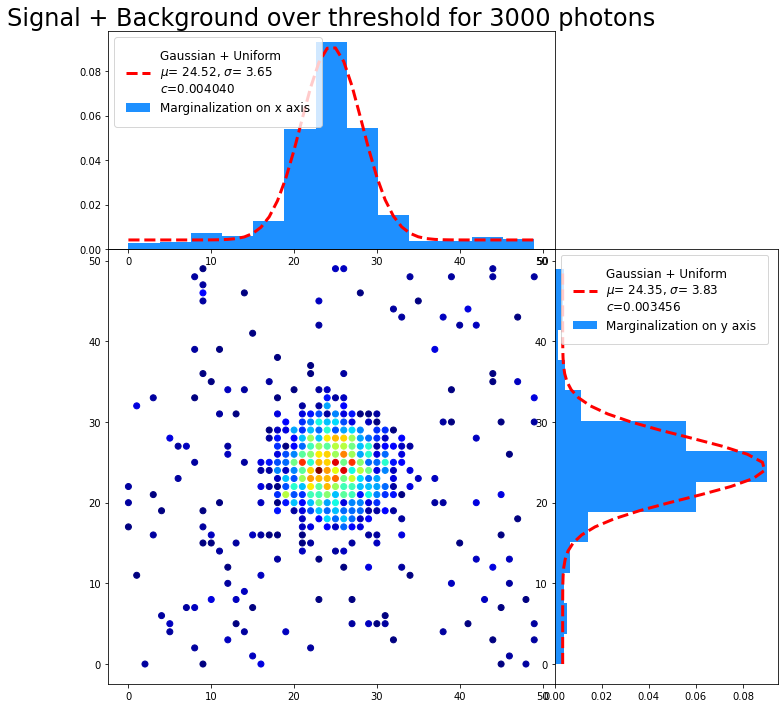

In [10]:
# Istogramma segnale+rumore

def dist(x,a,b,c,d):
  return d*np.exp(-0.5*((x-a)/b)**2) /(b*np.sqrt(2*np.pi)) + c      # Funzione per il fit funzione di x e parametri (a,b,c,d)

hist_x = np.apply_along_axis(sum,0,grid)
hist_y = np.apply_along_axis(sum,1,grid)

x = np.linspace(0,L-1,L)

par_y, cov_y= curve_fit(dist,x,hist_y/sum(hist_y),p0=[24.5,4,1/50,1]) # Fit della funzione: par contiene i parametri (a,b,c,d), cov la matrice di covarianza
par_x, cov_x= curve_fit(dist,x,hist_x/sum(hist_x),p0=[24.5,4,1/50,1])

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

ax1 = plt.subplot2grid((3,3),(1,0),rowspan=2,colspan=2)
ax1.scatter(points[:,0],points[:,1],c=points[:,2],cmap='jet')

ax2 = plt.subplot2grid((3,3),(1,2),colspan=1,rowspan=2,sharey=ax1)
hist_y_fit = array_for_fit(hist_y)
ax2.hist(hist_y_fit, bins=13, density=True, color='dodgerblue', orientation='horizontal', label='Marginalization on y axis')
ax2.plot(par_y[3]*np.exp(-0.5*((x-par_y[0])/par_y[1])**2) /(par_y[1]*np.sqrt(2*np.pi)) + par_y[2], x, 'r--', linewidth=3, label='Gaussian + Uniform \n$\mu$= %.2lf, $\sigma$= %.2lf \n$c$=%lf'%(par_y[0], par_y[1],par_y[2]))
ax2.legend( loc='upper left', borderpad=1,fontsize=12)
 
ax3 = plt.subplot2grid((3,3),(0,0),colspan=2,rowspan=1,sharex=ax1)
hist_x_fit = array_for_fit(hist_x)
ax3.hist(hist_x_fit, bins=13, density=True, color='dodgerblue', label='Marginalization on x axis')
ax3.plot(x, par_x[3]*np.exp(-0.5*((x-par_x[0])/par_x[1])**2) /(par_x[1]*np.sqrt(2*np.pi)) + par_x[2], 'r--', linewidth=3, label='Gaussian + Uniform \n$\mu$= %.2lf, $\sigma$= %.2lf \n$c$=%lf'%(par_x[0], par_x[1],par_x[2]))
ax3.legend( loc='upper left', borderpad=1,fontsize=12)
plt.title('Signal + Background over threshold for %d photons'%n_samples, fontsize = 24)

plt.show()


**DBSCAN**

/Users/lory/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:193: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/lory/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:199: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/lory/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:205: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

Cluster Efficiency: 1.000000  with eps=4.00  min_samples=11.00  relative purity: 0.960526 Detection efficiency: 0.962025 Clusters found: 1


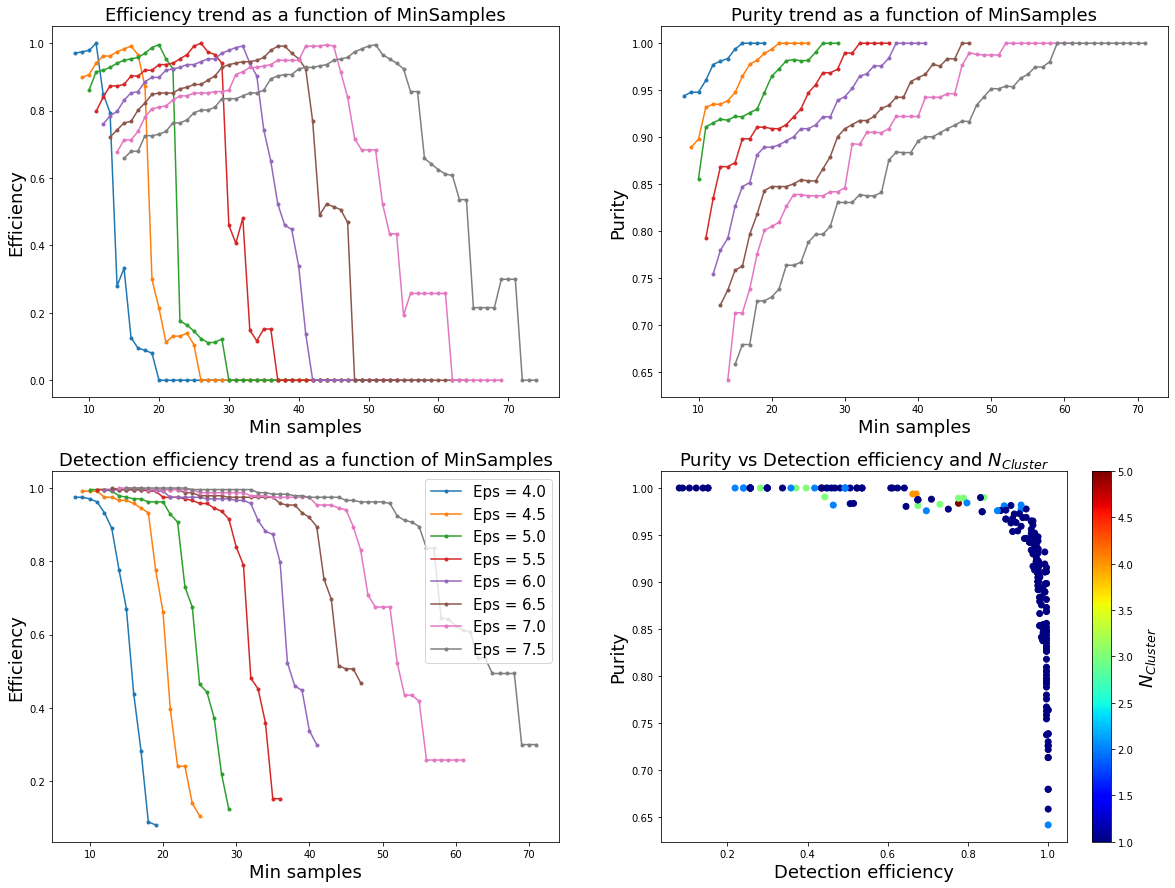

In [11]:
info_cluster = 0                #if !=0 print numero di cluster individuati, numero di punti rumore, parametri l'efficienza
plot_cluster = 0                #if !=0 plot dei cluster individuati
print_eff    = 0                #if !=0 print efficienza per ogni run
plot_purity  = 0                #if !=0 plot segnale individuato da dbscan rispetto segnale 'vero'

detection_efficiency_scatter = []
purity_scatter = []
n_clusters = []

min_eps = 4
max_eps = 8
step_eps = 0.5

max_purity=0
max_efficiency=0

for eps in np.arange(min_eps, max_eps, step_eps):

    min_min_samples = 2*eps
    max_min_samples = 10*eps
    step_min_samples = 1

    purity_plot= []
    min_samples_range=[]
    cluster_efficiency_plot = []
    detection_efficiency_plot = []
    min_samples_plot = []
    
    for min_samples in np.arange(min_min_samples, max_min_samples, step_min_samples):

        min_samples_plot.append(min_samples)

        # CLUSTERING

        db = DBSCAN(eps, min_samples).fit(points)
        core_samples_mask = np.zeros_like(db.labels_,dtype=bool)       # Inizializza un array booleano, della stessa forma di labels_
        core_samples_mask[db.core_sample_indices_] = True              # Considera tutti i core trovati da dbscan
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)    # Conta i cluster, togliendo il  rumore (k=-1)
        n_noise_ = list(labels).count(-1)                              # Numero di punti di rumore

        if info_cluster != 0:

          print('Estimated number of clusters: %d' % n_clusters_)
          print('Estimated number of noise points: %d' % n_noise_)

        # Plot dei cluster individuati

        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
        for each in np.linspace(0, 1, len(unique_labels))]             # Sceglie la palette di   colori senza il nero

        cluster_efficiency = 0
        weight_sum = 0

        clusters_points = (labels==-1)  # Seleziona tutti i punti clusterizzati tranne il rumore
        
        punti = points[~clusters_points]  # Punti clusterizzati da dbscan come segnale

        df = pd.DataFrame(data=punti,index=None)
        df.to_csv('data_%.1lf_%.1f.csv' %(eps,min_samples),index_label=False)
       
        for k, col in zip(unique_labels, colors):                      # Per ogni cluster, associo un colore
        
            class_member_mask = (labels == k)                          # Seleziona tutti i punti del cluster k

            xy_core = points[class_member_mask & core_samples_mask]    # Solo se è nel cluster E è un core point
            xy_border = points[class_member_mask & ~core_samples_mask] # Solo se è nel cluster E non è core  ==  è un edge point del cluster
            
            # Efficienza della clusterizzazione

            phot = 0                                      # Contatore di fotoni
            x = 0
            y = 0

            if k == -1:

              col = [0, 0, 0, 1]                          # Nero per il rumore

            else:

              for i in np.arange(0,len(xy_core),1):       # Somme sui pixel contenuti nel cluster k, pesate con il numero di fotoni
                
                x += xy_core[i][0] * xy_core[i][2]
                y += xy_core[i][1] * xy_core[i][2]
                phot += xy_core[i][2]

              for i in np.arange(0,len(xy_border),1):
                
                x += xy_border[i][0] * xy_border[i][2]
                y += xy_border[i][1] * xy_border[i][2]
                phot += xy_border[i][2]

              x /= phot
              y /= phot

              dist = np.sqrt((x-centers[0][0])**2+(y-centers[0][1])**2)
              clust_eff_partial = ((tot_signal - abs(tot_signal-len(xy_core)-len(xy_border)) )/tot_signal)*1/dist

              if clust_eff_partial < 0:
                
                cluster_efficiency += 0

              else:

                cluster_efficiency += clust_eff_partial
              
              weight_sum += 1/dist


            if plot_cluster != 0:

              plt.plot(xy_core[:, 0], xy_core[:, 1], '.',markerfacecolor=tuple(col),
                    markeredgecolor=tuple(col), markersize=5)

              plt.plot(xy_border[:, 0], xy_border[:, 1], '.',markerfacecolor=tuple(col),
                    markeredgecolor=tuple(col), markersize=5)

        # Purezza

        if len(punti) > 0:                                # Considero solo le run che trovano segnale

          len_sig=len(signal_plot)
          len_punti=len(punti)

          count_p=0                                       # Conta i pixel trovati da dbscan correttamente
          for i in range (len_sig):
            for j in range (len_punti):
              if punti[j,0]==signal_plot[i,0] and punti[j,1]==signal_plot[i,1] and punti[j,2]==signal_plot[i,2]:
                count_p+=1
        
            
          purity=1-(len(punti)-count_p)/count_p
          detection_efficiency=count_p/len(signal_plot)

          n_clusters.append(n_clusters_)
          detection_efficiency_scatter.append(detection_efficiency)
          detection_efficiency_plot.append(detection_efficiency)
          min_samples_range.append(min_samples)
          purity_plot.append(purity)
          purity_scatter.append(purity)

          # Variabili grafico colorato

          #Y=np.array(purity_colored)
          #X=np.array(min_samples_range)
          
          if plot_purity!=0:

            print('Punti segnale dbscan=%d   Punti segnale vero=%d   Intersezione=%d  purity=%f   eps=%.3f   min_samples=%.3f' %(len_punti,len_sig,count_p,purity,eps,min_samples)) 
            plt.title('Plot del segnale trovato da dbscan vs segnale vero')
            plt.plot(punti[:,0],punti[:,1],'r.')
            plt.plot(signal_plot[:,0],signal_plot[:,1],'b.')
            fig = matplotlib.pyplot.gcf()
            fig.set_size_inches(6,6)
            plt.show()

        # Efficienza
         
        if n_clusters_ != 0:

          cluster_efficiency /= weight_sum
          
          cluster_efficiency_plot.append(cluster_efficiency)

        else:
          
          cluster_efficiency_plot.append(0)
          
          
        if print_eff != 0:
          print('Eps: %.2f Min_samples: %.2f Efficiency: %f Purity: : %f' %(eps,min_samples,efficiency,purity))

        if cluster_efficiency > max_efficiency:           # Definisce l'efficienza più alta
          minsample_best_eff = min_samples
          eps_best_eff = eps
          max_efficiency = cluster_efficiency
          clust_eff = cluster_efficiency
          det_eff = detection_efficiency
          purity_eff = purity
          n_clust = n_clusters[-1]

        if plot_cluster != 0:

          plt.title('Eps=%.1lf, min_samples=%d, estimated number of clusters: %d' % (eps,min_samples,n_clusters_))
          fig = matplotlib.pyplot.gcf()
          fig.set_size_inches(6,6)
          plt.show()

    # Plot 2d

    plt.subplot(2,2,1)
    plt.title('Efficiency trend as a function of MinSamples',fontsize=18)
    plt.xlabel('Min samples',fontsize=18)
    plt.ylabel('Efficiency',fontsize=18)
    plt.plot(min_samples_plot,cluster_efficiency_plot,'.-',label='Eps = %.1lf' %eps)

    plt.subplot(2,2,2)
    plt.title('Purity trend as a function of MinSamples',fontsize=18)
    plt.xlabel('Min samples',fontsize=18)
    plt.ylabel('Purity',fontsize=18)
    plt.plot(min_samples_range,purity_plot,'.-',label='Eps = %.1lf' %eps)

    plt.subplot(2,2,3)
    plt.title('Detection efficiency trend as a function of MinSamples',fontsize=18)
    plt.xlabel('Min samples',fontsize=18)
    plt.ylabel('Efficiency',fontsize=18)
    plt.plot(min_samples_range,detection_efficiency_plot,'.-',label='Eps = %.1lf' %eps)

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(20, 15)

 
plt.legend(loc='upper right',fontsize=15)

fig.savefig('plot_purity_efficiency.png')

print('Cluster Efficiency: %f  with eps=%.2f  min_samples=%.2f  relative purity: %f Detection efficiency: %f Clusters found: %d' %(clust_eff,eps_best_eff,minsample_best_eff,purity_eff,det_eff,n_clust))

# Scatter Purity vs Detection Efficiency

fig = plt.subplot(2,2,4)
#ax = fig.gca(projection='3d')
plt.scatter(detection_efficiency_scatter,purity_scatter,c=n_clusters,cmap='jet')
#fig = matplotlib.pyplot.gcf()
ax = plt.colorbar()
ax.set_label('$N_{Cluster}$',fontsize=18)
plt.title('Purity vs Detection efficiency and $N_{Cluster}$',fontsize=18)
plt.xlabel('Detection efficiency',fontsize=18)
plt.ylabel('Purity',fontsize=18)
plt.show()

**RICOSTRUZIONE ISTOGRAMMA**

In [0]:
def dist(x,a,b,c,d):
  return d*np.exp(-0.5*((x-a)/b)**2) /(b*np.sqrt(2*np.pi)) + c

df = pd.read_csv('data_%.1lf_%.1lf.csv' %(eps_best_eff,minsample_best_eff))
signal_list_dbscan= pd.DataFrame.to_numpy(df)
signal_reconstructed = np.zeros((L,L))

for i in np.arange(0,len(signal_list_dbscan),1):

  l = int(signal_list_dbscan[i,0])
  m = int(signal_list_dbscan[i,1])
  n = int(signal_list_dbscan[i,2])  

  signal_reconstructed[m][l] = n

hist_x = np.apply_along_axis(sum,0,signal_reconstructed)
hist_y = np.apply_along_axis(sum,1,signal_reconstructed)

xx = np.linspace(0,L-1,L)

par_y, cov_y= curve_fit(dist,xx,hist_y/sum(hist_y),p0=[24.5,4,0,1]) # Fit della funzione: par contiene i parametri (a,b,c,d), cov la matrice di covarianza
par_x, cov_x= curve_fit(dist,xx,hist_x/sum(hist_x),p0=[24.5,4,0,1])

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

ax1 = plt.subplot2grid((3,3),(1,0),rowspan=2,colspan=2)
ax1.scatter(signal_list_dbscan[:,0],signal_list_dbscan[:,1],c=signal_list_dbscan[:,2],cmap='jet')

ax2 = plt.subplot2grid((3,3),(1,2),colspan=1,rowspan=2,sharey=ax1)
hist_y_fit = array_for_fit(hist_y)
ax2.hist(hist_y_fit, bins=11, density=True, color='dodgerblue', orientation='horizontal', label='Marginalization on y axis')
ax2.plot(par_y[3]*np.exp(-0.5*((xx-par_y[0])/par_y[1])**2) /(par_y[1]*np.sqrt(2*np.pi)) + par_y[2], xx, 'r--', linewidth=3, label='Gaussian + Uniform \n$\mu$= %.2lf, $\sigma$= %.2lf \n$c$=%lf'%(par_y[0], par_y[1],par_y[2]))
ax2.legend( loc='upper left', borderpad=1,fontsize=12)
 
ax3 = plt.subplot2grid((3,3),(0,0),colspan=2,rowspan=1,sharex=ax1)
hist_x_fit = array_for_fit(hist_x)
ax3.hist(hist_x_fit, bins=11, density=True, color='dodgerblue', label='Marginalization on x axis')
ax3.plot(xx, par_x[3]*np.exp(-0.5*((xx-par_x[0])/par_x[1])**2) /(par_x[1]*np.sqrt(2*np.pi)) + par_x[2], 'r--', linewidth=3, label='Gaussian + Uniform \n$\mu$= %.2lf, $\sigma$= %.2lf \n$c$=%lf'%(par_x[0], par_x[1],par_x[2]))
ax3.legend( loc='upper left', borderpad=1,fontsize=12)
plt.title('Reconstructed Signal + Background', fontsize = 24)

plt.show()

